<a href="https://colab.research.google.com/github/kl2217/finite-element/blob/main/fisherstest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install --upgrade scipy

In [47]:
import numpy as np
import scipy.special
import scipy.stats as stats
import matplotlib.pyplot as plt

In [48]:
# Contingency table
#               Study Group  Control Group
# Positive       t           102 - t
# Negative       31000 - t    31000 - (102 - t)

# Example with t = 39 (observed value)
study_positive = 39
control_positive = 102 - 39
study_negative = 31000 - 39
control_negative = 31000 - (102 - 39)

contingency_table = np.array([[study_positive, control_positive],
                             [study_negative, control_negative]])


P-value for t = 39: 0.011094091843958116


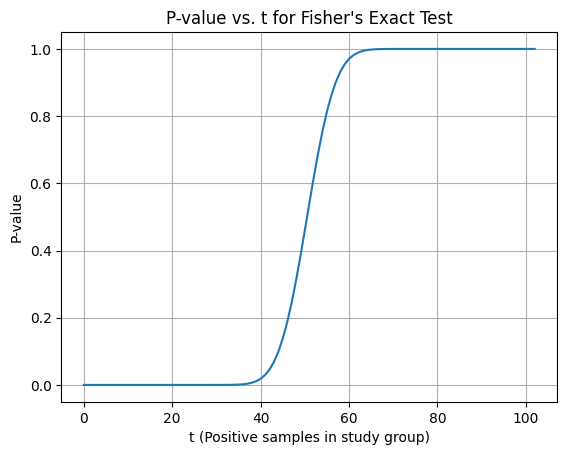

In [49]:
# Function to calculate the p-value for a given t
def calculate_p_value(t):
    study_positive = t
    control_positive = 102 - t
    study_negative = 31000 - t
    control_negative = 31000 - (102 - t)

    # Calculate the p-value by summing probabilities of tables as or more extreme
    p_value = 0
    for i in range(t + 1):
        study_positive_i = i
        control_positive_i = 102 - i

        # Use log of combinations to avoid overflow
        # Replace logcomb with gammaln for older SciPy versions
        # Fisher's exact test p-value formula:
        # $P(t) = \frac{\binom{n_1}{t} \binom{n_2}{k - t}}{\binom{n_1 + n_2}{k}}$
        # where:
        # $n_1$ = study group size (31000)
        # $n_2$ = control group size (31000)
        # $k$ = total positive cases (102)
        # $t$ = positive cases in the study group (variable)
        # $\binom{n}{k} = \frac{n!}{k!(n - k)!}$

        log_prob_i = (scipy.special.gammaln(31000 + 1) - scipy.special.gammaln(study_positive_i + 1) - scipy.special.gammaln(31000 - study_positive_i + 1) +
                       scipy.special.gammaln(31000 + 1) - scipy.special.gammaln(control_positive_i + 1) - scipy.special.gammaln(31000 - control_positive_i + 1) -
                       (scipy.special.gammaln(62000 + 1) - scipy.special.gammaln(102 + 1) - scipy.special.gammaln(62000 - 102 + 1)))

        # Exponentiate to get the actual probability
        prob_i = np.exp(log_prob_i)

        p_value += prob_i

    return p_value

# Calculate p-value for t = 39 (observed value)
p_value_observed = calculate_p_value(39)
print(f"P-value for t = 39: {p_value_observed}")

p_values = [calculate_p_value(t) for t in range(103)]

plt.plot(range(103), p_values)
plt.xlabel("t (Positive samples in study group)")
plt.ylabel("P-value")
plt.title("P-value vs. t for Fisher's Exact Test")
plt.grid(True)
plt.show()